In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [38]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Shape: (150, 5) 

Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Target distribution:
 Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64 



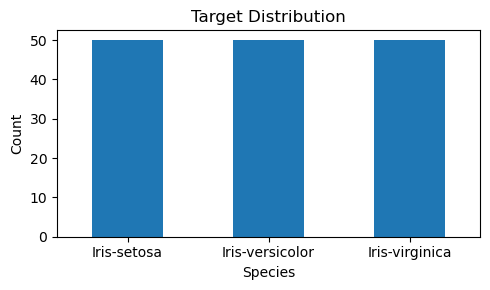

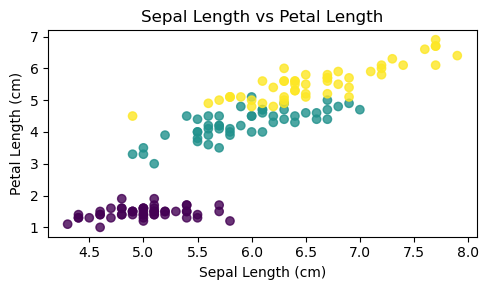

In [39]:
df.drop(columns=["Id"], inplace=True)
# ================== EDA ==================
print("Shape:", df.shape, "\n")
print("Missing values:\n", df.isnull().sum(), "\n")
print("Target distribution:\n", df["Species"].value_counts(), "\n")

# -------- Plot 1: Target Distribution --------
plt.figure(figsize=(5, 3))
df["Species"].value_counts().plot(kind="bar")
plt.title("Target Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
print("\n")

# -------- Plot 2: Sepal vs Petal Length --------
plt.figure(figsize=(5, 3))
plt.scatter(
    df["SepalLengthCm"],
    df["PetalLengthCm"],
    c=df["Species"].astype("category").cat.codes,
    alpha=0.8
)
plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.tight_layout()
plt.show()

In [42]:
# ================== Train / Validation Split ==================
X = df.drop("Species", axis=1)
y = df["Species"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [44]:
# ================== Full Tree (Overfitting Evidence) ==================
full_tree = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42
)
full_tree.fit(X_train, y_train)

train_acc_full = accuracy_score(y_train, full_tree.predict(X_train))
val_acc_full = accuracy_score(y_val, full_tree.predict(X_val))

print("Full Tree Training Accuracy:", train_acc_full)
print("Full Tree Validation Accuracy:", val_acc_full)

Full Tree Training Accuracy: 1.0
Full Tree Validation Accuracy: 0.9333333333333333


In [46]:
# ================== Simulated Pruning using max_depth ==================
depths = range(1, 11)
train_acc = []
val_acc = []

for d in depths:
    tree = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=d,
        random_state=42
    )
    tree.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, tree.predict(X_train)))
    val_acc.append(accuracy_score(y_val, tree.predict(X_val)))

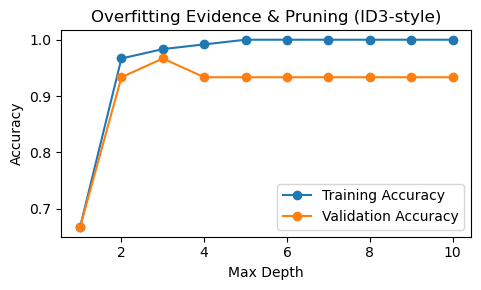

Chosen Depth after Pruning: 3


In [48]:
# -------- Plot Overfitting Evidence --------
plt.figure(figsize=(5, 3))
plt.plot(depths, train_acc, marker="o", label="Training Accuracy")
plt.plot(depths, val_acc, marker="o", label="Validation Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Evidence & Pruning (ID3-style)")
plt.legend()
plt.tight_layout()
plt.show()

best_depth = depths[val_acc.index(max(val_acc))]
print("Chosen Depth after Pruning:", best_depth)

In [50]:
pruned_tree = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=best_depth,
    random_state=42
)
pruned_tree.fit(X_train, y_train)

y_pred = pruned_tree.predict(X_val)

# ================== Metrics ==================
print("\n--- Pruned Tree Metrics ---")
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score (weighted):", f1_score(y_val, y_pred, average="weighted"))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


--- Pruned Tree Metrics ---
Accuracy: 0.9666666666666667
F1 Score (weighted): 0.9665831244778613

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



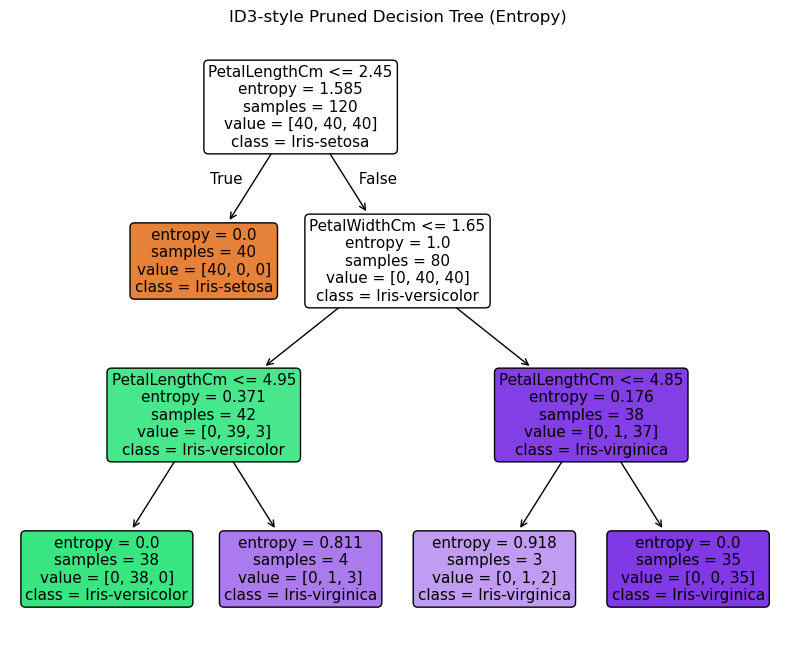

In [52]:
plt.figure(figsize=(10, 8))
plot_tree(
    pruned_tree,
    feature_names=X.columns,
    class_names=pruned_tree.classes_,
    filled=True,
    rounded=True
)
plt.title("ID3-style Pruned Decision Tree (Entropy)")
plt.show()

In [ ]:
"""
Conclusion: 
1. A full decision tree trained with entropy exhibited overfitting, as indicated by very high training accuracy and lower validation accuracy.
2. ID3-style pruning was simulated by restricting the maximum depth of the tree.
3. Validation accuracy and the training–validation performance gap were used as evidence for pruning.
4. The pruned tree achieved better generalization and reduced model complexity.
5. This demonstrates how pruning improves performance and interpretability in decision tree models.
"""